In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
head = df.head()
head.to_csv('head.csv')

In [ ]:
df.drop(columns=['month'])

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,type,family,perishable
0,21668508,2014-04-01,9,554145,11.0,False,B,GROCERY I,0
1,21770711,2014-04-03,9,554145,15.0,False,B,GROCERY I,0
2,22221275,2014-04-12,9,554145,3.0,False,B,GROCERY I,0
3,22273569,2014-04-13,9,554145,2.0,False,B,GROCERY I,0
4,22716417,2014-04-22,9,554145,6.0,False,B,GROCERY I,0
...,...,...,...,...,...,...,...,...,...
3359995,65309655,2015-12-19,12,1239955,9.0,False,C,DAIRY,1
3359996,66287793,2015-12-30,12,1239955,9.0,True,C,DAIRY,1
3359997,66781530,2016-01-05,12,1239955,24.0,False,C,DAIRY,1
3359998,67350505,2016-01-11,12,1239955,23.0,False,C,DAIRY,1


In [ ]:
df['family'].unique()

array(['GROCERY I', 'POULTRY', 'CLEANING', 'FROZEN FOODS', 'BEVERAGES',
       'DELI', 'DAIRY', 'BREAD/BAKERY', 'EGGS', 'LIQUOR,WINE,BEER',
       'GROCERY II', 'LINGERIE', 'MEATS', 'PERSONAL CARE',
       'PREPARED FOODS', 'AUTOMOTIVE', 'HARDWARE'], dtype=object)

In [ ]:
df.describe()

,id,store_nbr,item_nbr,unit_sales,month,perishable
count,3.360000e+06,3.360000e+06,3.360000e+06,3.360000e+06,3.360000e+06,3.360000e+06
mean,6.829698e+07,2.709081e+01,7.239426e+05,8.040749e+00,6.427344e+00,2.483039e-01
std,3.032198e+07,1.579751e+01,3.527625e+05,2.435006e+01,3.293640e+00,4.320291e-01
min,2.165766e+07,1.000000e+00,1.080790e+05,-2.390000e+02,1.000000e+00,0.000000e+00
25%,4.167893e+07,1.300000e+01,4.144210e+05,2.000000e+00,4.000000e+00,0.000000e+00
50%,6.554200e+07,2.800000e+01,7.598930e+05,4.000000e+00,6.000000e+00,0.000000e+00
75%,9.405448e+07,4.100000e+01,1.047753e+06,9.000000e+00,9.000000e+00,0.000000e+00
max,1.254964e+08,5.400000e+01,1.253765e+06,3.000000e+04,1.200000e+01,1.000000e+00


## category vs sales

In [ ]:
df_category_sales = df.groupby('family').unit_sales.sum().reset_index()
df_category_sales

,family,unit_sales
0,AUTOMOTIVE,1.035000e+04
1,BEVERAGES,4.721629e+06
2,BREAD/BAKERY,1.672716e+06
3,CLEANING,3.018045e+06
4,DAIRY,2.775793e+06
5,DELI,8.982720e+05
6,EGGS,4.395460e+05
7,FROZEN FOODS,1.403840e+05
8,GROCERY I,1.102936e+07
9,GROCERY II,8.342000e+03


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


Text(0, 0.5, 'Sales')

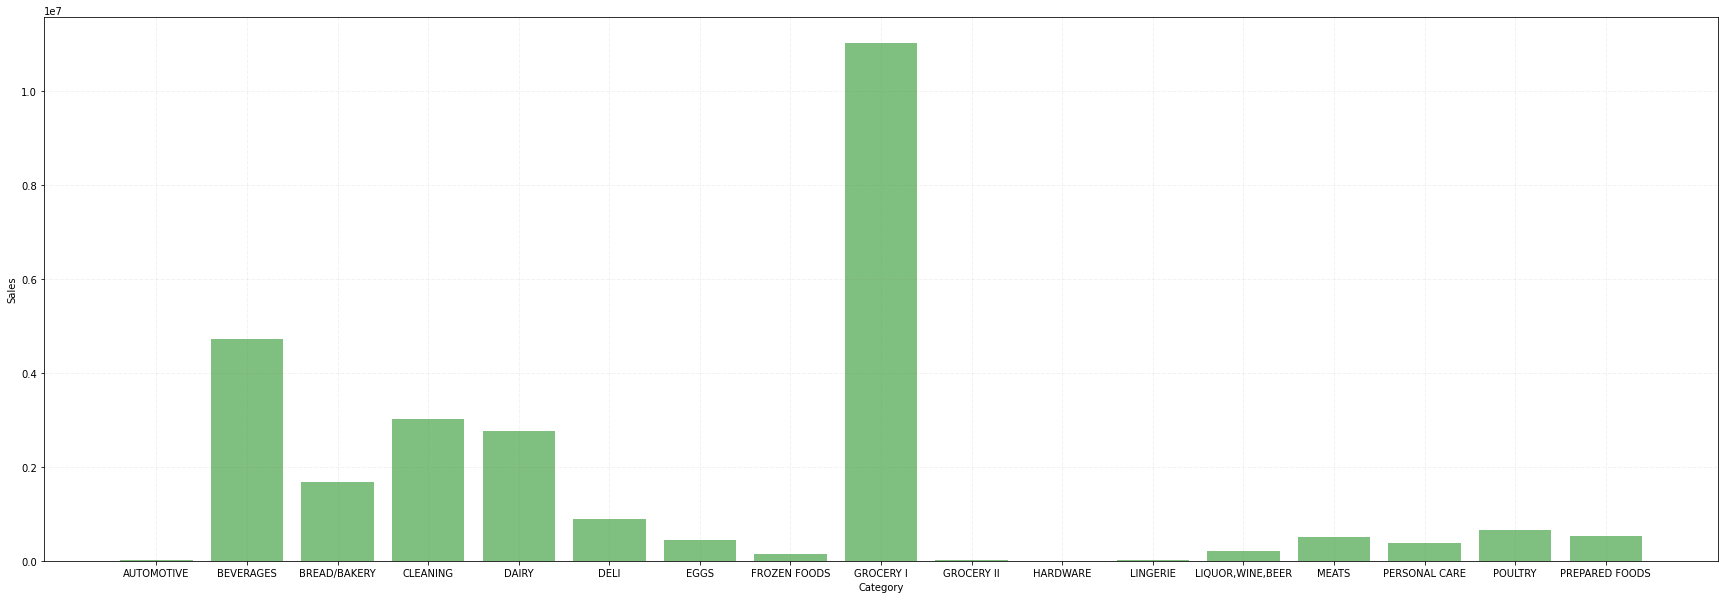

In [ ]:
# fig = plt.figure(figsize = (18, 5))

# plt.bar(df_category_sales['family'], df_category_sales['unit_sales'], width = 0.4)

# plt.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)

# plt.xlabel("Category")
# plt.ylabel("Sales number")
# plt.show()

plt.figure(figsize=[30, 10]) #, dpi = 500
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.bar(df_category_sales['family'], df_category_sales['unit_sales'], color = 'green', alpha=0.5) 

plt.xlabel('Category')
plt.ylabel('Sales')


In [ ]:
df_onprom_sales = df.groupby('onpromotion').unit_sales.sum().reset_index()
df_onprom_sales



,onpromotion,unit_sales
0,False,2.444117e+07
1,True,2.575743e+06


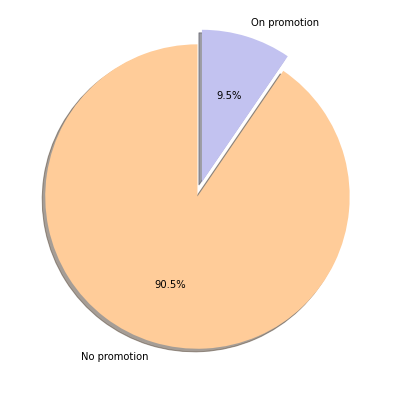

In [ ]:
labels = df.replace([False, True], ['No promotion', 'On promotion'])['onpromotion'].unique()
colors = ['#ffcc99', '#c2c2f0']
explode = (0, 0.1)  



fig1, ax1 = plt.subplots(figsize = [7, 7])
ax1.pie(df_onprom_sales['unit_sales'], explode=explode, labels=labels, autopct='%1.1f%%', colors = colors,
        shadow=True, startangle=90)
plt.show()

## perishable vs sales

In [ ]:
df_perishable_sales = df.groupby('perishable').unit_sales.sum().reset_index()
df_perishable_sales

,perishable,unit_sales
0,0,1.952108e+07
1,1,7.495832e+06


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Sales')

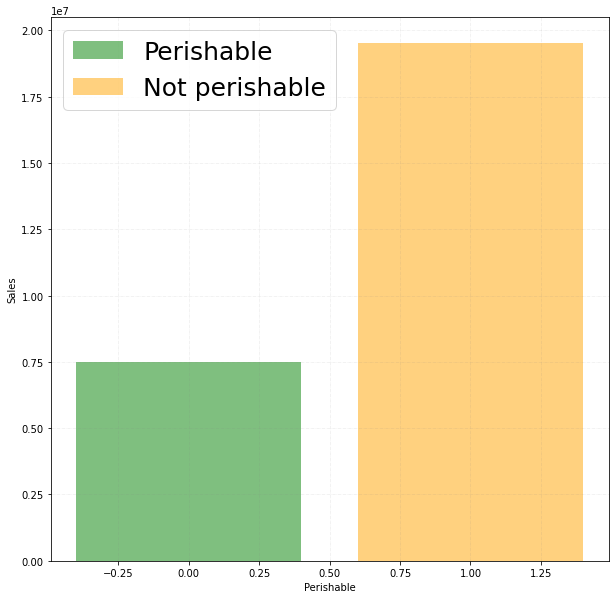

In [ ]:
plt.figure(figsize=[10, 10]) #, dpi = 500
plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

plt.bar(0, df_perishable_sales[df_perishable_sales.perishable == 1]['unit_sales'], color = 'green', alpha=0.5, label='Perishable' ) 
plt.bar(1, df_perishable_sales[df_perishable_sales.perishable == 0]['unit_sales'], color = 'orange', alpha=0.5, label = 'Not perishable')

plt.legend(fontsize = 25)
plt.xlabel('Perishable')
plt.ylabel('Sales')

In [ ]:
df_store_sales = df.groupby('type').unit_sales.sum().reset_index()
df_store_sales

,type,unit_sales
0,A,7.740309e+06
1,B,4.637850e+06
2,C,5.379232e+06
3,D,7.416578e+06
4,E,1.842948e+06


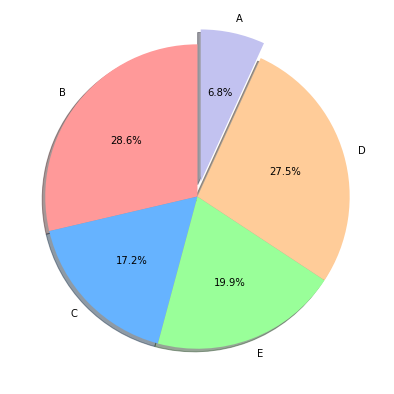

In [ ]:
# fig = plt.figure(figsize = (7, 5))

# plt.pie(df_store_sales['unit_sales'])
# plt.show()

import matplotlib.pyplot as plt

labels = df.replace([1, 2, 3, 4, 5], ['A', 'B', 'C', 'D', 'E'])['type'].unique()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
explode = (0, 0, 0, 0, 0.1)  


fig1, ax1 = plt.subplots(figsize = [7, 7])
ax1.pie(df_store_sales['unit_sales'], explode=explode, labels=labels, autopct='%1.1f%%', colors = colors,
        shadow=True, startangle=90)
plt.show()

In [ ]:
df_per_prom = df.drop(columns = ['id', 'store_nbr', 'item_nbr', 'unit_sales', 'type', 'family', 'date', 'month'])
df_per_prom

,onpromotion,perishable
0,False,0
1,False,0
2,False,0
3,False,0
4,False,0
...,...,...
3359995,False,1
3359996,True,1
3359997,False,1
3359998,False,1


In [ ]:
newone = df_per_prom.groupby('onpromotion').perishable.sum().reset_index()
newone

,onpromotion,perishable
0,False,734931
1,True,99370


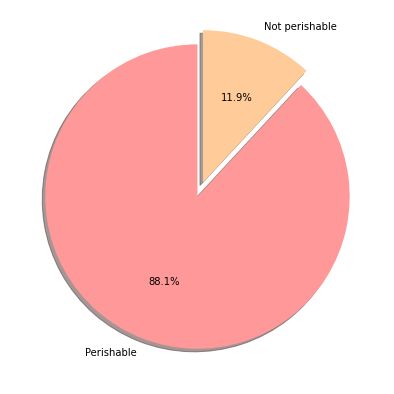

In [ ]:
import matplotlib.pyplot as plt

labels = 'Perishable', 'Not perishable'
colors = ['#ff9999','#ffcc99']
explode = (0, 0.1)  


fig1, ax1 = plt.subplots(figsize = [7, 7])
ax1.pie(newone['perishable'], explode=explode, labels=labels, autopct='%1.1f%%', colors = colors,
        shadow=True, startangle=90) 
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lst = list(df['family'].unique())
# plt.figure(figsize = [30, 10])
labels = df.replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], ['GROCERY I', 'POULTRY', 'CLEANING', 'FROZEN FOODS', 'BEVERAGES',
       'DELI', 'DAIRY', 'BREAD/BAKERY', 'EGGS', 'LIQUOR,WINE,BEER',
       'GROCERY II', 'LINGERIE', 'MEATS', 'PERSONAL CARE',
       'PREPARED FOODS', 'AUTOMOTIVE', 'HARDWARE'])['family'].unique()

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = [30, 15], dpi = 500)

rects2 = ax.bar(x - width/2, [df[(df['family'] == i) & (df['onpromotion'] == 0)].unit_sales.sum() for i in lst], color = 'salmon', width=width, label='Without promotion')
rects4 = ax.bar(x + width/2, [df[(df['family'] == i) & (df['onpromotion'] == 1)].unit_sales.sum() for i in lst], color = 'cornflowerblue', width=width, label='With promotion')


ax.set_xticks(x, labels) 
ax.tick_params(axis='both', which='major')
ax.legend(fontsize = 50)

fig.tight_layout()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lst = list(df['type'].unique())
# plt.figure(figsize = [30, 10])
labels = df.replace([1, 2, 3, 4, 5], ['A', 'B', 'C', 'D', 'E'])['type'].unique()

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize = [30, 15], dpi = 500)

rects2 = ax.bar(x - width/2, [df[(df['type'] == i) & (df['onpromotion'] == 0)].unit_sales.sum() for i in lst], color = 'orange', width=width, label='Without promotion')
rects4 = ax.bar(x + width/2, [df[(df['type'] == i) & (df['onpromotion'] == 1)].unit_sales.sum() for i in lst], color = 'forestgreen', width=width, label='With promotion')


ax.set_xticks(x, labels, size=50) 
ax.tick_params(axis='both', which='major', labelsize=50)
ax.legend(fontsize = 50)

fig.tight_layout()

## GeoPandas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
geo = gpd.read_file('ecuador.geojson')

In [ ]:
cit = pd.read_csv('stores.csv')

In [ ]:
geo

,DPA_VALOR,DPA_ANIO,DPA_CANTON,DPA_DESCAN,DPA_PROVIN,DPA_DESPRO,PCODE2,geometry
0,0,2011,0101,CUENCA,01,AZUAY,EC0101,"MULTIPOLYGON (((-79.39303 -2.49798, -79.39052 ..."
1,0,2011,0102,GIRON,01,AZUAY,EC0102,"MULTIPOLYGON (((-79.02892 -3.17588, -79.02701 ..."
2,0,2011,0103,GUALACEO,01,AZUAY,EC0103,"MULTIPOLYGON (((-78.63193 -2.93822, -78.63687 ..."
3,0,2011,0104,NABON,01,AZUAY,EC0104,"MULTIPOLYGON (((-78.93581 -3.28822, -78.93412 ..."
4,0,2011,0105,PAUTE,01,AZUAY,EC0105,"MULTIPOLYGON (((-78.64190 -2.72233, -78.64778 ..."
...,...,...,...,...,...,...,...,...
219,0,2011,2402,LA LIBERTAD,24,SANTA ELENA,EC2402,"MULTIPOLYGON (((-80.87062 -2.27018, -80.87315 ..."
220,0,2011,2403,SALINAS,24,SANTA ELENA,EC2403,"MULTIPOLYGON (((-80.92200 -2.21943, -80.92059 ..."
221,0,2011,9001,LAS GOLONDRINAS,90,ZONA NO DELIMITADA,EC9001,"MULTIPOLYGON (((-78.92286 0.35833, -78.92784 0..."
222,0,2011,9003,MANGA DEL CURA,90,ZONA NO DELIMITADA,EC9003,"MULTIPOLYGON (((-79.45992 -0.50373, -79.45941 ..."


In [ ]:
cit

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
cit['state'] = cit['state'].str.upper()

In [ ]:
cit.head()

,store_nbr,city,state,type,cluster
0,1,Quito,PICHINCHA,D,13
1,2,Quito,PICHINCHA,D,13
2,3,Quito,PICHINCHA,D,8
3,4,Quito,PICHINCHA,D,9
4,5,Santo Domingo,SANTO DOMINGO DE LOS TSACHILAS,D,4


In [ ]:
data = pd.concat([cit, geo], axis=1, join='inner')
display(data)  

,store_nbr,city,state,type,cluster,DPA_VALOR,DPA_ANIO,DPA_CANTON,DPA_DESCAN,DPA_PROVIN,DPA_DESPRO,PCODE2,geometry
0,1,Quito,PICHINCHA,D,13,0,2011,0101,CUENCA,01,AZUAY,EC0101,"MULTIPOLYGON (((-79.39303 -2.49798, -79.39052 ..."
1,2,Quito,PICHINCHA,D,13,0,2011,0102,GIRON,01,AZUAY,EC0102,"MULTIPOLYGON (((-79.02892 -3.17588, -79.02701 ..."
2,3,Quito,PICHINCHA,D,8,0,2011,0103,GUALACEO,01,AZUAY,EC0103,"MULTIPOLYGON (((-78.63193 -2.93822, -78.63687 ..."
3,4,Quito,PICHINCHA,D,9,0,2011,0104,NABON,01,AZUAY,EC0104,"MULTIPOLYGON (((-78.93581 -3.28822, -78.93412 ..."
4,5,Santo Domingo,SANTO DOMINGO DE LOS TSACHILAS,D,4,0,2011,0105,PAUTE,01,AZUAY,EC0105,"MULTIPOLYGON (((-78.64190 -2.72233, -78.64778 ..."
5,6,Quito,PICHINCHA,D,13,0,2011,0106,PUCARA,01,AZUAY,EC0106,"MULTIPOLYGON (((-79.47671 -3.04682, -79.46256 ..."
6,7,Quito,PICHINCHA,D,8,0,2011,0107,SAN FERNANDO,01,AZUAY,EC0107,"MULTIPOLYGON (((-79.23552 -3.06262, -79.23240 ..."
7,8,Quito,PICHINCHA,D,8,0,2011,0108,SANTA ISABEL,01,AZUAY,EC0108,"MULTIPOLYGON (((-79.30373 -3.06660, -79.30437 ..."
8,9,Quito,PICHINCHA,B,6,0,2011,0109,SIGSIG,01,AZUAY,EC0109,"MULTIPOLYGON (((-78.77366 -2.98373, -78.77243 ..."
9,10,Quito,PICHINCHA,C,15,0,2011,0110,OÑA,01,AZUAY,EC0110,"MULTIPOLYGON (((-79.05200 -3.46120, -79.04447 ..."


In [ ]:
import warnings
warnings.filterwarnings('ignore')
geo['stores'] = 0
for i in range(len(geo)):
    geo['stores'].iloc[i] = len(cit[cit.state == geo.DPA_DESCAN.iloc[i]])

In [ ]:
geo

,DPA_VALOR,DPA_ANIO,DPA_CANTON,DPA_DESCAN,DPA_PROVIN,DPA_DESPRO,PCODE2,geometry,stores
0,0,2011,0101,CUENCA,01,AZUAY,EC0101,"MULTIPOLYGON (((-79.39303 -2.49798, -79.39052 ...",0
1,0,2011,0102,GIRON,01,AZUAY,EC0102,"MULTIPOLYGON (((-79.02892 -3.17588, -79.02701 ...",0
2,0,2011,0103,GUALACEO,01,AZUAY,EC0103,"MULTIPOLYGON (((-78.63193 -2.93822, -78.63687 ...",0
3,0,2011,0104,NABON,01,AZUAY,EC0104,"MULTIPOLYGON (((-78.93581 -3.28822, -78.93412 ...",0
4,0,2011,0105,PAUTE,01,AZUAY,EC0105,"MULTIPOLYGON (((-78.64190 -2.72233, -78.64778 ...",0
...,...,...,...,...,...,...,...,...,...
219,0,2011,2402,LA LIBERTAD,24,SANTA ELENA,EC2402,"MULTIPOLYGON (((-80.87062 -2.27018, -80.87315 ...",0
220,0,2011,2403,SALINAS,24,SANTA ELENA,EC2403,"MULTIPOLYGON (((-80.92200 -2.21943, -80.92059 ...",0
221,0,2011,9001,LAS GOLONDRINAS,90,ZONA NO DELIMITADA,EC9001,"MULTIPOLYGON (((-78.92286 0.35833, -78.92784 0...",0
222,0,2011,9003,MANGA DEL CURA,90,ZONA NO DELIMITADA,EC9003,"MULTIPOLYGON (((-79.45992 -0.50373, -79.45941 ...",0


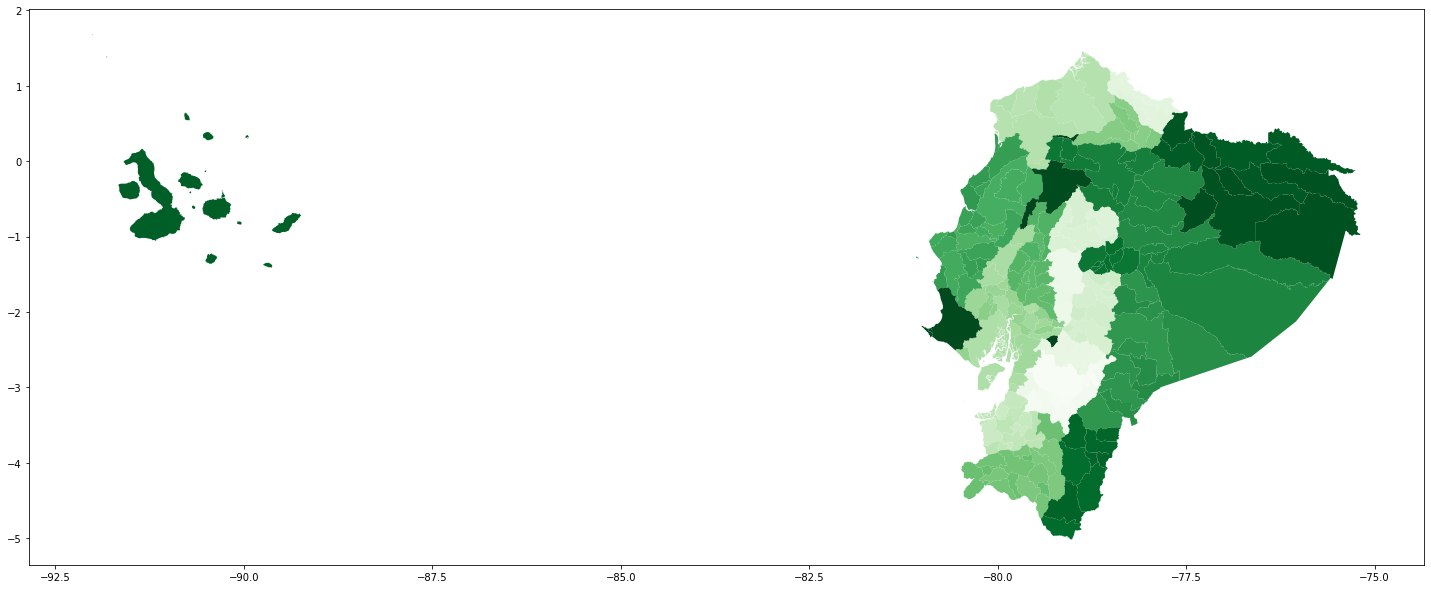

In [ ]:
geo[['geometry', 'stores']].plot(cmap = 'Greens', figsize=[25, 15]);

## Segmentation

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
df = pd.read_csv('dataset.csv')
crm = df.corr()
fig = px.imshow(crm, color_continuous_scale = 'algae')
fig.update_layout(paper_bgcolor="rgb(0,0,0,0)", font_color = "rgb(1, 1, 1)")
fig.show()

In [ ]:
df['type'] = df['type'].replace(['A', 'B', 'C', 'D', 'E'], [1, 2, 3, 4, 5])
df['family'] = df['family'].replace(['GROCERY I', 'POULTRY', 'CLEANING', 'FROZEN FOODS', 'BEVERAGES',
       'DELI', 'DAIRY', 'BREAD/BAKERY', 'EGGS', 'LIQUOR,WINE,BEER',
       'GROCERY II', 'LINGERIE', 'MEATS', 'PERSONAL CARE',
       'PREPARED FOODS', 'AUTOMOTIVE', 'HARDWARE'], [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 37.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


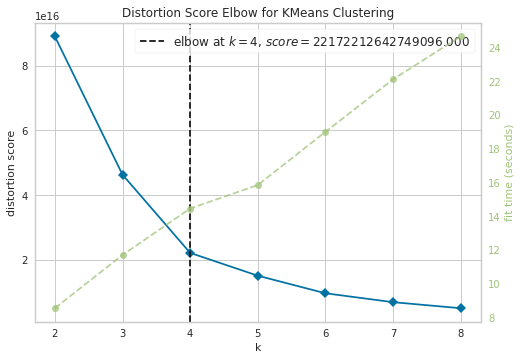

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn import preprocessing
import warnings
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))

visualizer.fit(df.drop(columns = ['date', 'id', 'month']))
visualizer.show() 

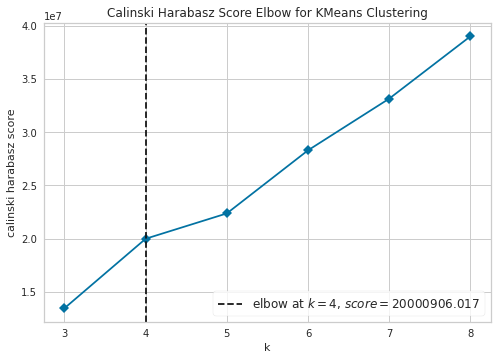

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,9), metric = 'calinski_harabasz', timings=False, locate_elbow=True)

visualizer.fit(df.drop(columns = ['date', 'id', 'month']))
visualizer.show() 

In [ ]:
from sklearn.cluster import KMeans
clusters = 4
km = KMeans(n_clusters = clusters, random_state = 42, init='random')
km.fit(df.drop(columns = ['date', 'id', 'month'])) 

KMeans(init='random', n_clusters=4, random_state=42)

In [ ]:
y=km.predict(df.drop(columns = ['date', 'id', 'month']))
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,month,type,family,perishable,label
0,21668508,2014-04-01,9,554145,11.0,False,4,2,1,0,1
1,21770711,2014-04-03,9,554145,15.0,False,4,2,1,0,1
2,22221275,2014-04-12,9,554145,3.0,False,4,2,1,0,1
3,22273569,2014-04-13,9,554145,2.0,False,4,2,1,0,1
4,22716417,2014-04-22,9,554145,6.0,False,4,2,1,0,1


In [ ]:
print('Cluster 0:', f'{round(len(df[df.label == 0])/len(df) *100, 2)}%')
print('Cluster 1:', f'{round(len(df[df.label == 1])/len(df) *100, 2)}%')
print('Cluster 2:', f'{round(len(df[df.label == 2])/len(df) *100, 2)}%')
print('Cluster 3:', f'{round(len(df[df.label == 3])/len(df) *100, 2)}%') 
# print('Cluster 4:', f'{round(len(df[df.label == 4])/len(df) *100, 2)}%') 

Cluster 0: 22.9%
Cluster 1: 24.2%
Cluster 2: 22.85%
Cluster 3: 30.05%


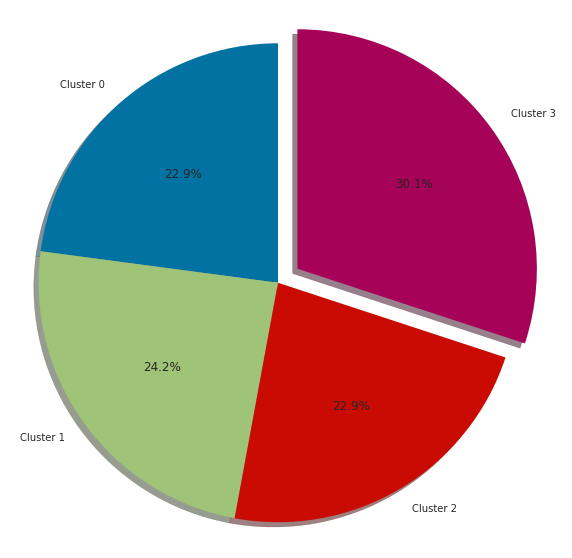

In [ ]:
import matplotlib.pyplot as plt

labels = 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'
sizes = [round(len(df[df.label == i])/len(df) *100, 2) for i in range(4)]
explode = (0, 0, 0, 0.1)  
sizes

fig1, ax1 = plt.subplots(figsize = [10,10])
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

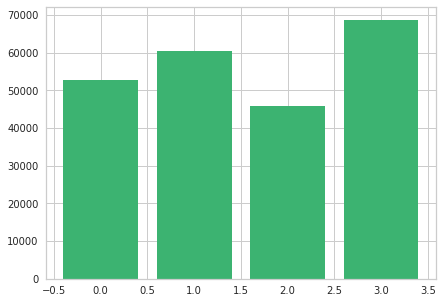

In [ ]:
#распределение количества промоушнс по кластерам
dfcl1 = df.groupby('label').onpromotion.sum().reset_index()

fig = plt.figure(figsize = (7, 5))

plt.bar(dfcl1['label'], dfcl1['onpromotion'], color = 'mediumseagreen') 
plt.show()

In [ ]:
df.columns

Index(['id', 'date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion',
       'month', 'type', 'family', 'perishable', 'label'],
      dtype='object')

Text(0, 0.5, 'Percentage on promotion')

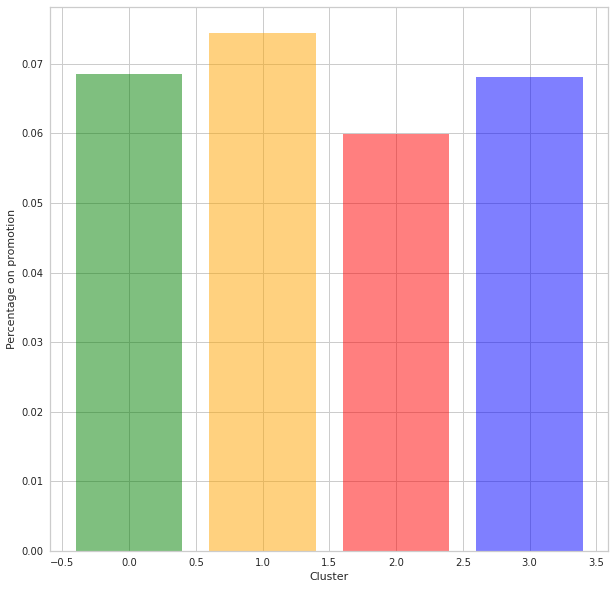

In [ ]:
plt.figure(figsize=[10, 10]) #, dpi = 500

plt.bar(0, df[df.label == 0]['onpromotion'].astype(int).mean(), color = 'green', alpha=0.5 ) 
plt.bar(1, df[df.label == 1]['onpromotion'].astype(int).mean(), color = 'orange', alpha=0.5 )
plt.bar(2, df[df.label == 2]['onpromotion'].astype(int).mean(), color = 'red', alpha=0.5 )
plt.bar(3, df[df.label == 3]['onpromotion'].astype(int).mean(), color = 'blue', alpha=0.5 )
# plt.legend([f'Cluster {i}' for i in range(4)])
plt.xlabel('Cluster')
plt.ylabel('Percentage on promotion')
# plt.savefig('bar_1.png', dpi = 500)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
lst = list(df['type'].unique())
# plt.figure(figsize = [30, 10])
labels = df.replace([1, 2, 3, 4, 5], ['A', 'B', 'C', 'D', 'E'])['type'].unique()

x = np.arange(len(lst))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots(figsize = [30, 15], dpi = 500)
rects1 = ax.bar(x - 2*width, [df[(df.label == 0) & (df['type'] == i)].unit_sales.sum() for i in lst], color = 'mediumseagreen', width=width, label='Cluster 0')
rects2 = ax.bar(x - width, [df[(df.label == 1) & (df['type'] == i)].unit_sales.sum() for i in lst], color = 'orange', width=width, label='Cluster 1')
rects3 = ax.bar(x, [df[(df.label == 2) & (df['type'] == i)].unit_sales.sum() for i in lst], color = 'tomato', width=width, label='Cluster 2')
rects4 = ax.bar(x + width, [df[(df.label == 3) & (df['type'] == i)].unit_sales.sum() for i in lst], color = 'cornflowerblue', width=width, label='Cluster 3')


ax.set_xticks(x, labels, size=50) #, rotation=90
ax.tick_params(axis='both', which='major', labelsize=50)
ax.legend(fontsize = 50)

fig.tight_layout()

# plt.savefig('bar_3.png' , dpi = 500)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


Text(0, 0.5, 'Percentage of perishable')

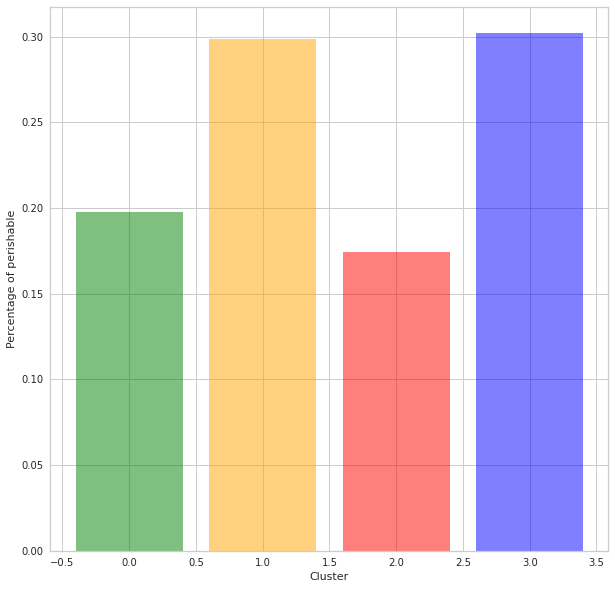

In [ ]:
plt.figure(figsize=[10, 10]) #, dpi = 500

plt.bar(0, df[df.label == 0]['perishable'].astype(int).mean(), color = 'green', alpha=0.5 ) 
plt.bar(1, df[df.label == 1]['perishable'].astype(int).mean(), color = 'orange', alpha=0.5 )
plt.bar(2, df[df.label == 2]['perishable'].astype(int).mean(), color = 'red', alpha=0.5 )
plt.bar(3, df[df.label == 3]['perishable'].astype(int).mean(), color = 'blue', alpha=0.5 )
# plt.legend([f'Cluster {i}' for i in range(4)])
plt.xlabel('Cluster')
plt.ylabel('Percentage of perishable')
# plt.savefig('bar_1.png', dpi = 500)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0b06fa9-9dc8-48e0-ad5a-d1d1aa37a190' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>